<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>  

<div align="center"><span style="font-family:Arial Black;font-size:33px;color:darkblue"> Master Economie Finance </span></div>

<div align="center"><span style="font-family:Arial Black;font-size:27px;color:darkblue">Application Lab – Portfolio Management</span></div>

<div align="center"><span style="font-family:Arial Black;font-size:20px;color:darkblue">Capital asset pricing model
</span></div>

In [1]:
import pandas as pd
from typing import Dict, Tuple, List, Optional
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.figure import Figure

In [2]:
# Consigne

- Fill in the code of this Notebook wherever you see "..." using the comments.

- Don’t hesitate to take ownership of the existing code by running parts of it in separate cells.

In [3]:
df_CAC = pd.read_excel("data_CAC.xlsx",sheet_name="Prices",index_col="Dates").loc["2011-12-30":"2016-12-30",:]

In [4]:
df_CAC.head()

,OR FP Equity,DG FP Equity,STLA FP Equity,URW NA Equity,TTE FP Equity,AI FP Equity,DSY FP Equity,CS FP Equity,ERF FP Equity,BNP FP Equity,...,VIE FP Equity,SAN FP Equity,GLE FP Equity,SU FP Equity,AIR FP Equity,LR FP Equity,ACA FP Equity,RI FP Equity,STM FP Equity,WLN FP Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2011-12-30,80.70,33.760,NaN,138.90,39.500,63.5925,6.193,10.045,5.633,30.350,...,8.1656,56.75,17.205,40.680,24.150,24.850,4.360,71.66,4.591,NaN
2012-01-02,81.80,34.450,NaN,137.80,40.000,64.6170,6.285,10.430,5.750,31.290,...,8.6149,57.42,17.685,41.560,24.500,25.160,4.433,72.47,4.703,NaN
2012-01-03,82.12,34.755,NaN,138.25,40.445,64.8432,6.263,10.580,5.937,31.335,...,8.5194,57.29,17.600,43.260,24.500,25.305,4.433,72.06,4.946,NaN
2012-01-04,81.33,34.550,NaN,136.60,40.135,64.4308,6.182,10.400,5.750,30.650,...,8.1829,56.21,17.000,42.080,24.565,25.160,4.300,71.62,4.791,NaN
2012-01-05,81.42,34.060,NaN,134.45,39.860,63.2998,6.195,9.890,5.661,29.000,...,7.9168,55.50,16.080,42.505,24.890,24.770,4.076,71.53,4.726,NaN


In [5]:
 # remove columns where all values are NaN
df_CAC = df_CAC.dropna(axis=1)
df_CAC.head()


,OR FP Equity,DG FP Equity,URW NA Equity,TTE FP Equity,AI FP Equity,DSY FP Equity,CS FP Equity,ERF FP Equity,BNP FP Equity,BN FP Equity,...,ALO FP Equity,VIE FP Equity,SAN FP Equity,GLE FP Equity,SU FP Equity,AIR FP Equity,LR FP Equity,ACA FP Equity,RI FP Equity,STM FP Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2011-12-30,80.70,33.760,138.90,39.500,63.5925,6.193,10.045,5.633,30.350,48.570,...,21.7256,8.1656,56.75,17.205,40.680,24.150,24.850,4.360,71.66,4.591
2012-01-02,81.80,34.450,137.80,40.000,64.6170,6.285,10.430,5.750,31.290,49.245,...,22.3422,8.6149,57.42,17.685,41.560,24.500,25.160,4.433,72.47,4.703
2012-01-03,82.12,34.755,138.25,40.445,64.8432,6.263,10.580,5.937,31.335,49.790,...,22.6621,8.5194,57.29,17.600,43.260,24.500,25.305,4.433,72.06,4.946
2012-01-04,81.33,34.550,136.60,40.135,64.4308,6.182,10.400,5.750,30.650,48.585,...,22.3515,8.1829,56.21,17.000,42.080,24.565,25.160,4.300,71.62,4.791
2012-01-05,81.42,34.060,134.45,39.860,63.2998,6.195,9.890,5.661,29.000,48.430,...,21.5540,7.9168,55.50,16.080,42.505,24.890,24.770,4.076,71.53,4.726


In [6]:
def compute_return(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute daily returns for all stocks
    
    Parameters:
        df (pd.DataFrame): DataFrame with dates as index and tickers as columns
    
    Returns:
        pd.DataFrame: a new DataFrame containing the daily returns
    """
    return_df = df.pct_change()
    return return_df.dropna()

In [7]:
df_return = compute_return(df_CAC)
df_return.head()

,OR FP Equity,DG FP Equity,URW NA Equity,TTE FP Equity,AI FP Equity,DSY FP Equity,CS FP Equity,ERF FP Equity,BNP FP Equity,BN FP Equity,...,ALO FP Equity,VIE FP Equity,SAN FP Equity,GLE FP Equity,SU FP Equity,AIR FP Equity,LR FP Equity,ACA FP Equity,RI FP Equity,STM FP Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2012-01-02,0.013631,0.020438,-0.007919,0.012658,0.016110,0.014855,0.038328,0.020770,0.030972,0.013897,...,0.028381,0.055024,0.011806,0.027899,0.021632,0.014493,0.012475,0.016743,0.011303,0.024396
2012-01-03,0.003912,0.008853,0.003266,0.011125,0.003501,-0.003500,0.014382,0.032522,0.001438,0.011067,...,0.014318,-0.011085,-0.002264,-0.004806,0.040905,0.000000,0.005763,0.000000,-0.005658,0.051669
2012-01-04,-0.009620,-0.005898,-0.011935,-0.007665,-0.006360,-0.012933,-0.017013,-0.031497,-0.021861,-0.024202,...,-0.013706,-0.039498,-0.018851,-0.034091,-0.027277,0.002653,-0.005730,-0.030002,-0.006106,-0.031338
2012-01-05,0.001107,-0.014182,-0.015739,-0.006852,-0.017554,0.002103,-0.049038,-0.015478,-0.053834,-0.003190,...,-0.035680,-0.032519,-0.012631,-0.054118,0.010100,0.013230,-0.015501,-0.052093,-0.001257,-0.013567
2012-01-06,-0.002948,-0.009542,-0.013760,0.003261,-0.002627,0.009201,-0.009100,-0.016958,-0.018793,-0.003407,...,-0.020646,-0.010105,0.013514,-0.032027,-0.001882,-0.005022,-0.000202,0.013003,0.005592,0.026238


In [8]:
def compute_descriptive_stats(return_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute descriptive statistics for each stock
    
    Parameters:
        return_df (pd.DataFrame): DataFrame of daily returns
    
    Returns:
        pd.DataFrame: a new DataFrame containing the descriptive statistics
    """

    annualized_factor = 252
    trading_days_in_df = len(return_df.index)
    annualized_return = (1 + return_df).prod()**(annualized_factor/trading_days_in_df) -1
    
    stats = pd.DataFrame()
    stats['Annualized return'] = annualized_return #(note: geometric returns)
    stats['Annualized volatility'] = df_return.var()
    stats['Skewness'] = return_df.skew()
    stats['Kurtosis'] = return_df.kurtosis()
    stats['Minimum return'] = return_df.min()
    stats['Maximum return'] = return_df.max()
    return stats


In [9]:
df_stat = compute_descriptive_stats(df_return)
df_stat.head()

,Annualized return,Annualized volatility,Skewness,Kurtosis,Minimum return,Maximum return
OR FP Equity,0.159162,0.000172,0.135202,1.437910,-0.052116,0.055594
DG FP Equity,0.133841,0.000213,-0.084490,2.006807,-0.072080,0.060044
URW NA Equity,0.099262,0.000186,-0.003417,1.086802,-0.059604,0.047525
TTE FP Equity,0.041343,0.000225,-0.163794,2.313009,-0.078992,0.075725
AI FP Equity,0.063129,0.000164,-0.174790,2.367017,-0.073999,0.052723


In [10]:
def compute_correlation_matrix(return_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute the correlation matrix between stocks
    
    Parameters:
        return_df (pd.DataFrame): DataFrame of daily returns
    
    Returns:
        pd.DataFrame: Correlation matrix
    """
    return return_df.corr()


In [11]:
def compute_capm(df_return: pd.DataFrame, rf: float = 0.01) -> pd.DataFrame:
    """
    Compute CAPM for each stock using an equally-weighted market return estimate without rebalancing.
    
    Parameters:
        df_return (pd.DataFrame): DataFrame of daily returns.
        rf (float): Annualized risk-free rate.
    
    Returns:
        pd.DataFrame: DataFrame containing betas and expected returns.
    """
    # number of stocks
    nb_stock = len(df_return.columns)
    # create a pd.Series, poids_marche with index equals to return_df columns name. The value of the series are the intial weight
    # All weights must be equal at inception (equally-weighted portfolio)
    market_weights = pd.Series(1 / nb_stock, index=df_return.columns)
    
    market_return_daily = pd.Series(index=df_return.index)  # create an empty pd.Series with the same indices as df_return
    portfolio_value = [100]  # initial value of the market portfolio

    # Compute the market return for the day
        market_return_daily[day] = (df_return.loc[day] * market_weights).sum()
        # Update portfolio values without rebalancing, i.e compute the new value of the portfolio based on the weighted performance of the stocks.
        portfolio_value.append(portfolio_value[-1] * (1 + market_return_daily[day]))
       
        # compute weight drift (weights drift according to asset performance)
        market_weights = market_weights * (1 + df_return.loc[day])
        market_weights /= sum(market_weights_updated)  # normalize market_weights_updated so that the sum of weights is 1

    # Compute total annualized return (note: geometric returns)
    annualized_market_return = (1 + market_return_daily).prod() ** (252 / len(market_return_daily)) - 1
    
    # Compute betas
    betas = {}
    for stock in df_return.columns:
        covar = np.cov(df_return[stock], market_return_daily)[0,1]
        var_rm = market_return_daily.var()
        beta = covar/var_rm
        betas[stock] = beta
    
    # Compute risk premium (excess market return over the risk-free rate)
    risk_premium = annualized_market_return - rf
    
    # Compute expected returns
    expected_returns = {}
    for stock, beta in betas.items():
        expected_returns[stock] = rf + beta * risk_premium
    
    return pd.DataFrame({
        'Beta': betas,
        'Expected return': expected_returns,
        'Risk premium': risk_premium,
        'Market return': annualized_market_return
    })


In [12]:
def portfolio_optimization(df_return, rf=0.01, target_return=None):
    """
    Compute the minimum variance portfolio in the Markowitz sense.
    If a target return is provided as input, the function computes an efficient portfolio under the constraint of a target return.
    """
    # number of assets
    n_assets = len(df_return.columns)
    # NOTE: assumption that returns are small and iid: approximation of the geometric mean by the arithmetic mean
    mu = (1 + df_return).prod()**(252/len(df_return.index)) -1  # annualized mean (252 * mean of the daily return)
    cov_matrix = df_return.cov() * 252 # annualized variance-covariance matrix
    
    def portfolio_variance(weights, cov_matrix):
        return np.dot(np.dot(weights.T, cov_matrix), weights)
    
    def portfolio_expected_return(weights, mu):
        return np.dot(weights, mu)
    
    # declaration of optimization constraints (portfolio 100% invested + target return if provided by the user)
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    ]
    
    if target_return is not None:
        constraints.append(
            {'type': 'eq', 'fun': lambda x: portfolio_expected_return(x, mu) - target_return}
        )
    
    # bounds for the asset weights
    bounds = tuple((0, 1) for _ in range(n_assets))
    weights_init = np.array([1/n_assets] * n_assets)
    
    result = minimize(portfolio_variance, weights_init, args= (cov_matrix,),
                     method='SLSQP',
                     bounds=bounds,
                     constraints=constraints)
    
    weights_opt = result.x
    rendement_portefeuille = portfolio_expected_return(weights_opt, mu)
    volatilite_portefeuille = np.sqrt(portfolio_variance(weights_opt, cov_matrix))
    
    
    return {
        'Weights': pd.Series(weights_opt, index=df_return.columns),
        'Expected return': rendement_portefeuille,
        'Volatility': volatilite_portefeuille
    }


In [13]:
def plot_efficient_frontier(
    df_return: pd.DataFrame, 
    rf: float = 0.01, 
    n_portfolios: int = 50
) -> Figure:
    """
    Plot the efficient frontier + the minimum variance and maximum Sharpe ratio portfolios
    
    Parameters:
        df_return (pd.DataFrame): DataFrame of daily returns
        rf (float): Annualized risk-free rate
        n_portfolios (int): Number of portfolios to compute
    
    Returns:
        Figure: Matplotlib figure of the efficient frontier
    """
    # create a linspace of length n_portfolios between the minimum annualized mean return and the maximum annualized mean return
    returns_range = np.linspace(
        df_return.mean().min() * 252,  # lowest expected return
        df_return.mean().max() * 252,  # highest expected return
        n_portfolios  # number of points (50 by default)
    )
    
    volatilities = []
    returns_list = []
    sharpe_ratios = []
    
    min_volatility = float('inf')
    max_sharpe_ratio = -float('inf')
    min_volatility_portfolio = None
    max_sharpe_portfolio = None
    
    for target_return in returns_range:
        # for each mean return, estimate a min-variance portfolio under the constraint of a target return
        # store the result in result
        result = portfolio_optimization(df_return, rf, target_return)
        # retrieve optimal weights
        weights = result['Weights']
        # retrieve the volatility of this optimal portfolio
        portfolio_vol = result['Volatility']
        # store the return of the optimal portfolio for a given target return
        portfolio_return = target_return
        
        # compute the Sharpe ratio for this portfolio
        sharpe_ratio = (portfolio_return - rf) /portfolio_vol
        
        # add the values into volatilities, returns_list and sharpe_ratios
        volatilities.append(portfolio_vol)
        returns_list.append(portfolio_return)
        sharpe_ratios.append(sharpe_ratio)
        
        # Check if this is the minimum variance portfolio
        # if yes, update min_volatility and min_volatility_portfolio (a tuple with volatility and portfolio return)
        if portfolio_vol < min_volatility :
            min_volatility = portfolio_vol
            min_volatility_portfolio = (portfolio_vol, portfolio_return)
        
        # Check if this is the portfolio with the maximum Sharpe ratio
        # if yes, update max_sharpe_ratio and max_sharpe_portfolio (a tuple with volatility and portfolio return)
        if sharpe_ratio > max_sharpe_ratio :
            max_sharpe_ratio = sharpe_ratio
            max_sharpe_portfolio = (portfolio_vol, portfolio_return)
    
    # Split the frontier into two segments, below and above the min-variance portfolio
    min_index = volatilities.index(min_volatility)
    volatilities_below = volatilities[:min_index + 1]
    returns_below = returns_list[:min_index + 1]
    volatilities_above = volatilities[min_index:]
    returns_above = returns_list[min_index:]
    
    plt.figure(figsize=(12, 8))
    # Plot the part below min-variance in red and the part above in blue
    plt.plot(volatilities_below, returns_below, 'r-', label='Envelope of feasible portfolios')
    plt.plot(volatilities_above, returns_above, 'b-', label='Efficient frontier')
    
    # Add the minimum variance portfolio (green point)
    if min_volatility_portfolio is not None:
        plt.scatter(min_volatility_portfolio[0], min_volatility_portfolio[1], 
                    c='green', marker='o', s=100, label='Minimum variance portfolio')
    
    # add the maximum Sharpe ratio portfolio (orange point)
    if max_sharpe_portfolio is not None:
        plt.scatter(max_sharpe_portfolio[0], max_sharpe_portfolio[1], 
                    c='orange', marker='o', s=100, label='Tangent portfolio (max Sharpe)')
    
    # add a scatter plot for the stocks in the volatility/annualized return space
    vols_actions = df_return.std() * np.sqrt(252)
    returns_actions = df_return.mean() * 252
    plt.scatter(vols_actions, returns_actions, c='red', marker='o', label='Individual stocks')
    
    for i, txt in enumerate(df_return.columns):
        plt.annotate(txt, (vols_actions[i], returns_actions[i]))
    
    plt.xlabel('Annualized volatility')
    plt.ylabel('Expected annualized return')
    plt.title('Efficient Frontier, Minimum Variance Portfolio and Maximum Sharpe Ratio')
    plt.legend()
    plt.grid(True)
    
    return plt.gcf()  # .gcf() means "get current figure"

In [14]:
def chart_portfolio_composition(weights):
    """
    Display a bar chart showing the composition of the portfolio,
    sorted from the largest to the smallest weight.
    
    Parameters:
        weights (pd.Series): Vector of asset weights in the portfolio.
    """
    
    # Sort weights from largest to smallest
    sorted_weights = weights.sort_values(ascending=False)
    
    # Plot the chart
    plt.figure(figsize=(10, 6))
    sorted_weights.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Add titles and labels
    plt.title('Portfolio Composition', fontsize=16)
    plt.xlabel('Assets', fontsize=14)
    plt.ylabel('Weights', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Show the chart
    plt.tight_layout()
    plt.show()


In [15]:
def main() -> Dict[str, pd.DataFrame]:
    """
    Main function that executes the complete analysis
    
    Returns:
        Dict[str, pd.DataFrame]: Dictionary containing all analysis results
    """
    
    r_f = 0.01
    
    # Create a synthetic DataFrame
    df = df_CAC.copy(deep=True)
    
    print("1. Compute returns")
    print("-" * 50)
    df_return = compute_return(df)
    
    print("\n2. Descriptive statistics")
    print("-" * 50)
    stats = compute_descriptive_stats(df_return)
    print("\nStatistics by stock:")
    print(stats)
    
    print("\n3. Correlation matrix")
    print("-" * 50)
    corr = compute_correlation_matrix(df_return)
    
    print("\n4. CAPM analysis")
    print("-" * 50)
    capm_results = compute_capm(df_return, r_f)
    print("\nCAPM results:")
    print(capm_results)
    
    print("\n5. Optimal portfolio")
    print("-" * 50)
    ptf_optimal = portfolio_optimization(df_return, r_f)
    print("\nOptimal weights:")
    print(ptf_optimal)
    # display the chart of optimal portfolio weights
    chart_portfolio_composition(ptf_optimal['Weights'])
    
    
    print("\n6. Efficient frontier visualization")
    print("-" * 50)
    # display the efficient frontier
    fig = plot_efficient_frontier(df_return)
    plt.show()

    return {
        'returns': df_return,
        'stats': stats,
        'capm': capm_results,
        'weights_optimal': ptf_optimal["Weights"]
    }

1. Compute returns
--------------------------------------------------

2. Descriptive statistics
--------------------------------------------------

Statistics by stock:
                Annualized return  Annualized volatility  Skewness  Kurtosis  \
OR FP Equity             0.159162               0.000172  0.135202  1.437910   
DG FP Equity             0.133841               0.000213 -0.084490  2.006807   
URW NA Equity            0.099262               0.000186 -0.003417  1.086802   
TTE FP Equity            0.041343               0.000225 -0.163794  2.313009   
AI FP Equity             0.063129               0.000164 -0.174790  2.367017   
DSY FP Equity            0.178197               0.000167 -0.149906  9.422103   
CS FP Equity             0.183017               0.000360 -0.476631  4.947124   
ERF FP Equity            0.463641               0.000339  0.343310  3.258555   
BNP FP Equity            0.142674               0.000417 -0.321975  5.192109   
BN FP Equity             0.042

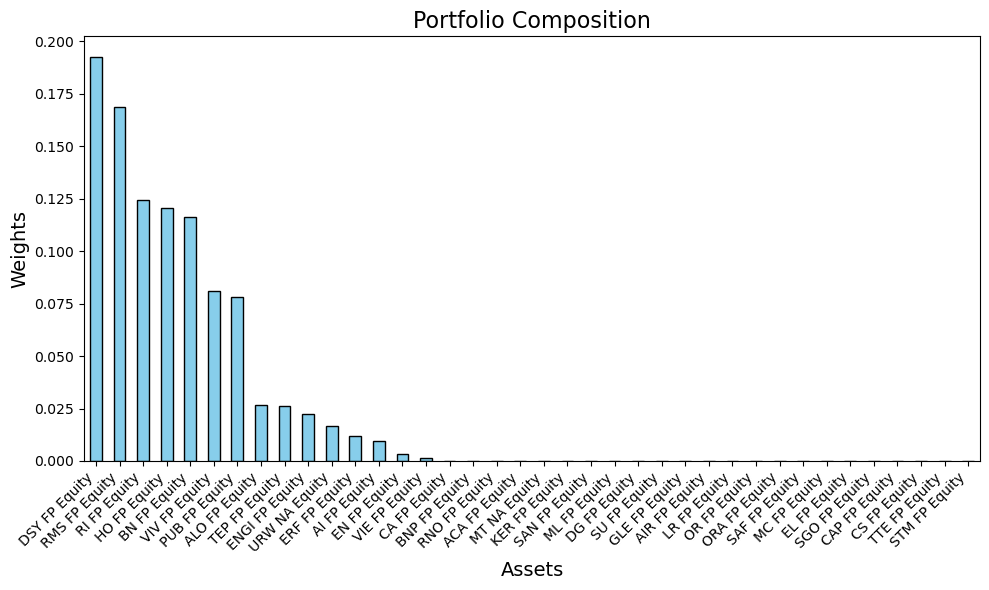


6. Efficient frontier visualization
--------------------------------------------------


/var/folders/l7/pj1hlfdd0ps42whw_xck619m0000gn/T/ipykernel_66797/2207246570.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (vols_actions[i], returns_actions[i]))


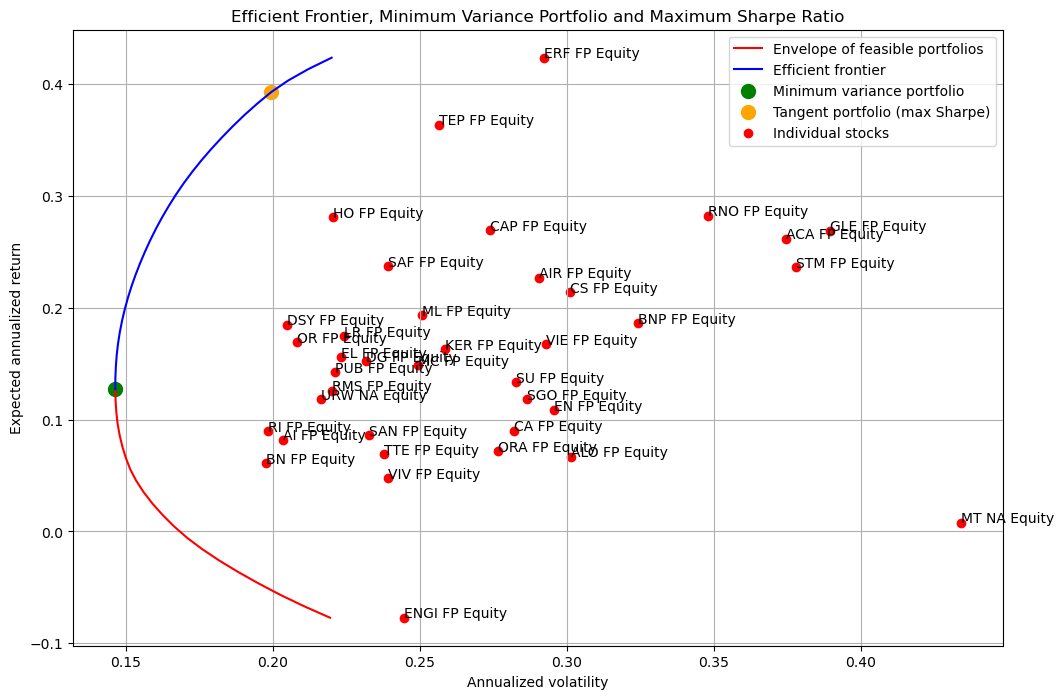

{'returns':             OR FP Equity  DG FP Equity  URW NA Equity  TTE FP Equity  \
 Dates                                                                  
 2012-01-02      0.013631      0.020438      -0.007919       0.012658   
 2012-01-03      0.003912      0.008853       0.003266       0.011125   
 2012-01-04     -0.009620     -0.005898      -0.011935      -0.007665   
 2012-01-05      0.001107     -0.014182      -0.015739      -0.006852   
 2012-01-06     -0.002948     -0.009542      -0.013760       0.003261   
 ...                  ...           ...            ...            ...   
 2016-12-26      0.000000      0.000000       0.000000       0.000000   
 2016-12-27      0.000869      0.000775       0.006093       0.000310   
 2016-12-28     -0.001737     -0.005269      -0.012113       0.007132   
 2016-12-29      0.001160      0.003116       0.013624      -0.001745   
 2016-12-30      0.004635      0.004814       0.015905       0.001748   
 
             AI FP Equity  DSY FP Equi

In [16]:
main()